
#A1:Question for Analysis

Is there a significant difference in customer churn rates between different states?


#A2:Benefit from Analysis

Analyzing churn rates across different states could help stakeholders, such as customer service managers and marketing teams, tailor their strategies to reduce churn. For instance, if a particular state shows a higher churn rate, targeted retention efforts could be deployed in that region.



#A3:Data identification


To analyze the question, "Is there a significant difference in customer churn rates between different states?" the following columns from the dataset are crucial:

**State**: This column identifies the state in which each customer resides. It is a categorical variable and will help in grouping customers by geographic location to observe if there are regional differences in churn rates. The state variable will be used to determine if customers in specific states are more likely to churn.

**Churn**: This binary column indicates whether a customer has churned (`Yes`) or remained with the service (`No`). It is the dependent variable for our analysis and serves as the outcome measure to see if the likelihood of churn varies across different states. Analyzing this variable in relation to the `State` column will allow us to perform the Chi-Square test to identify any significant patterns in customer behavior across regions.

By focusing on these two columns, the analysis will isolate geographic factors as potential drivers of customer churn, enabling the organization to target interventions more effectively. This approach can reveal whether specific states require more attention due to higher churn rates, or if efforts can be evenly distributed across all regions.


In [ ]:
#to read files from google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/D207')

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_regression

# Disabling warinings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/D207/churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [ ]:
#rename columns to python casing.
col_head = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'UID': 'uid',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',
    'Area': 'area',
    'TimeZone': 'timezone',
    'Job': 'job',
    'Children': 'children',
    'Age': 'age',
    'Education': 'education',
    'Employment': 'employment_type',
    'Income': 'income',
    'Marital': 'marital_type',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_perweek',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'yearly_equip_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'port_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone',
    'Multiple': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'monthly_charge',
    'Bandwidth_GB_Year': 'bandwidth_gb_year',
    'Item1': 'response_timeliness',
    'Item2': 'fix_timeliness',
    'Item3': 'replacement_timeliness',
    'Item4': 'service_reliability',
    'Item5': 'service_options',
    'Item6': 'respectful_communication',
    'Item7': 'courteous_interaction',
    'Item8': 'active_listening_skill'}

df.rename(columns=col_head, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   case_order                10000 non-null  int64  
 1   customer_id               10000 non-null  object 
 2   interaction               10000 non-null  object 
 3   uid                       10000 non-null  object 
 4   city                      10000 non-null  object 
 5   state                     10000 non-null  object 
 6   county                    10000 non-null  object 
 7   zip                       10000 non-null  int64  
 8   lat                       10000 non-null  float64
 9   lng                       10000 non-null  float64
 10  population                10000 non-null  int64  
 11  area                      10000 non-null  object 
 12  timezone                  10000 non-null  object 
 13  job                       10000 non-null  object 
 14  childre

In [ ]:
#The 'internet_service' column does not contain null or missing values instead "None" is interpreted as a null value. To fix this we change "None" to "N/A"
for col in ['internet_service']:
    df[col].fillna('N/A', inplace=True)
    print(df[col].value_counts())

internet_service
Fiber Optic    4408
DSL            3463
N/A            2129
Name: count, dtype: int64


In [ ]:
df.isnull().sum() #checking for null values

,0
case_order,0
customer_id,0
interaction,0
uid,0
city,0
state,0
county,0
zip,0
lat,0
lng,0


In [ ]:
#Fixing data values for conciseness

#Gender
dict_gen = {"gender": {
     "Male": "M",
     "Female": "F",
     "Prefer not to answer": "N/A",
}}
df.replace(dict_gen, inplace = True)

dict_mar = {"marital_type": {
     "Never Married": "Single",
}}
df.replace(dict_mar, inplace = True)

dict_pay = {"payment_method": {
     "Credit Card (automatic)": "Autopay",
     "Bank Transfer(automatic)": "Autopay",
     "Electronic Check": "eCheck",
     "Mailed Check": "Check",
}}
df.replace(dict_pay, inplace = True)

#Changing the following to string data type.
df_string = ['zip','lat','lng']
df[df_string] = df[df_string].astype("str")

#Changing the following to category data type.
df_cat = ['area','marital_type', 'gender','payment_method','response_timeliness',
          'fix_timeliness', 'replacement_timeliness', 'service_reliability',
          'service_options', 'respectful_communication', 'courteous_interaction',
          'active_listening_skill']
df[df_cat] = df[df_cat].astype("category")

In [ ]:
df.describe() #Summary statistics

,case_order,population,children,age,income,outage_sec_perweek,email,contacts,yearly_equip_failure,tenure,monthly_charge,bandwidth_gb_year
count,10000.00000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,2886.89568,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,1.00000,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,2500.75000,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,5000.50000,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,7500.25000,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,10000.00000,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


In [ ]:
df.state.value_counts() #Value counts for state

,count
state,
TX,603
NY,558
PA,550
CA,526
IL,413
OH,359
FL,324
MO,310
VA,285


In [ ]:
num_states = df.state.nunique()
print(f'There are {num_states} states in the dataset.')
#DC and Puerto Rico are considered as states in this Data Set.

There are 52 states in the dataset.


In [ ]:
df.churn.value_counts() #Value counts for churn

,count
churn,
No,7350
Yes,2650


In [ ]:
# Creating  a contingency table
churn_crosstab = pd.crosstab(df['state'],
df['churn'], margins=True, margins_name="subtotal")

In [ ]:
churn_crosstab

churn,No,Yes,subtotal
state,,,
AK,54,23,77
AL,139,42,181
AR,132,44,176
AZ,83,29,112
CA,388,138,526
CO,117,38,155
CT,46,25,71
DC,7,7,14
DE,15,6,21



#B2:Output

Chi-Square: 51.185367617210886

- The Chi-Square statistic measures the difference between the observed and expected frequencies in the contingency table. In this case, a value of 51.185367617210886 indicates that there is some difference between the observed and expected churn rates across different states, but this value alone does not tell us if the difference is statistically significant.

P-value: 0.9999969755238908

- The p-value is used to determine the significance of the results. It tells us the probability that the observed differences in churn rates across states could have occurred by random chance alone. A common threshold for significance is 0.05. If the p-value is less than 0.05, we reject the null hypothesis, meaning the differences are statistically significant. In this case, the p-value of 0.9999969755238908 is much higher than 0.05, indicating that the observed differences in churn rates across states are not statistically significant.


In [ ]:
# Computing Chi-square test
chi, p, dof, expected = chi2_contingency(churn_crosstab)
chi

51.185367617210886

In [ ]:
p #p-value

0.9999969755238908


#B3:Justification

The Chi-Square test is ideal for analyzing the relationship between two categorical variables, such as `State` and `Churn`, because it determines whether observed differences in churn rates across various states are statistically significant or simply due to chance. This test compares the observed frequencies of churn in each state with the expected frequencies if no relationship existed between the variables. It tests the null hypothesis that churn rates are independent of the state, helping to assess whether geographic factors influence customer churn. A low p-value would suggest a significant relationship, prompting further investigation into regional factors that may contribute to higher churn rates, whereas a high p-value indicates that any differences in churn rates are not statistically significant. This insight is valuable for stakeholders, guiding them on whether to focus on geographic factors or other aspects such as pricing or customer service in their efforts to reduce churn.


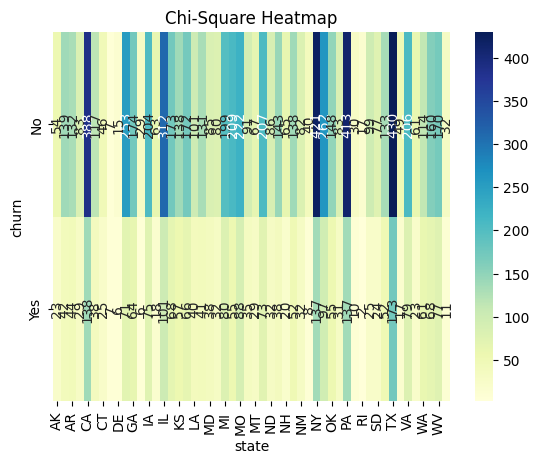

In [ ]:
heatmap = pd.crosstab(df['churn'], df['state'])
sns.heatmap(heatmap, annot=True, cmap="YlGnBu", fmt="d", annot_kws={"rotation": 90})
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (20,10)
plt.title('Chi-Square Heatmap')
plt.show()


#C:Univariate Statistics

**Continuous Variables**:

- MonthlyCharge: The monthly charge for each customer.

- Bandwidth_GB_Year: The yearly bandwidth usage in GB.

**Categorical Variables**:

- Churn: Whether the customer churned or not.

- State: The state where the customer is located.



#C1:Visual of Findings


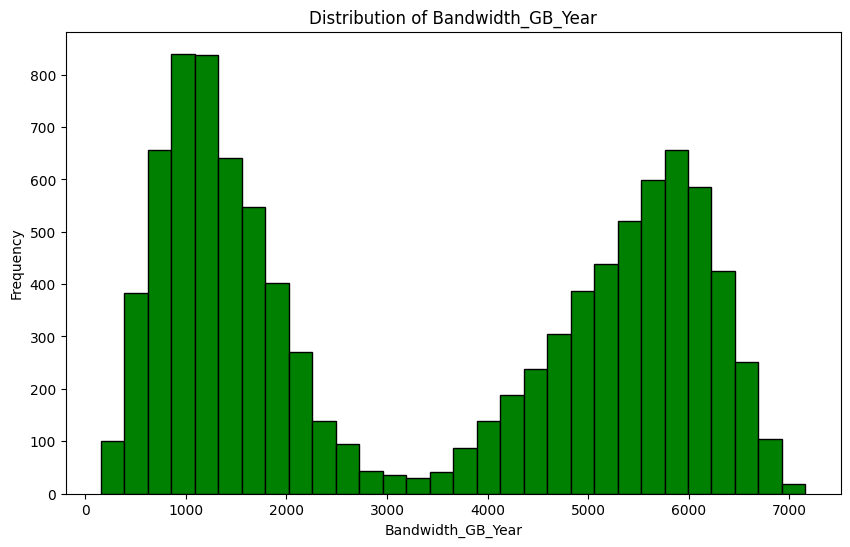

In [ ]:
# Plot the distribution of Bandwidth_GB_Year
plt.figure(figsize=(10, 6))
plt.hist(df['bandwidth_gb_year'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Bandwidth_GB_Year')
plt.xlabel('Bandwidth_GB_Year')
plt.ylabel('Frequency')
plt.show()



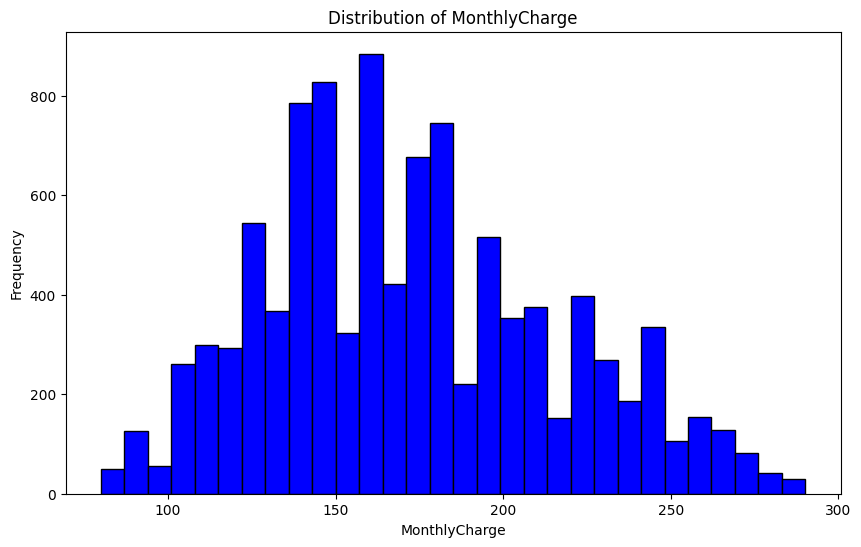

In [ ]:
# Plot the distribution of MonthlyCharge
plt.figure(figsize=(10, 6))
plt.hist(df['monthly_charge'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of MonthlyCharge')
plt.xlabel('MonthlyCharge')
plt.ylabel('Frequency')
plt.show()


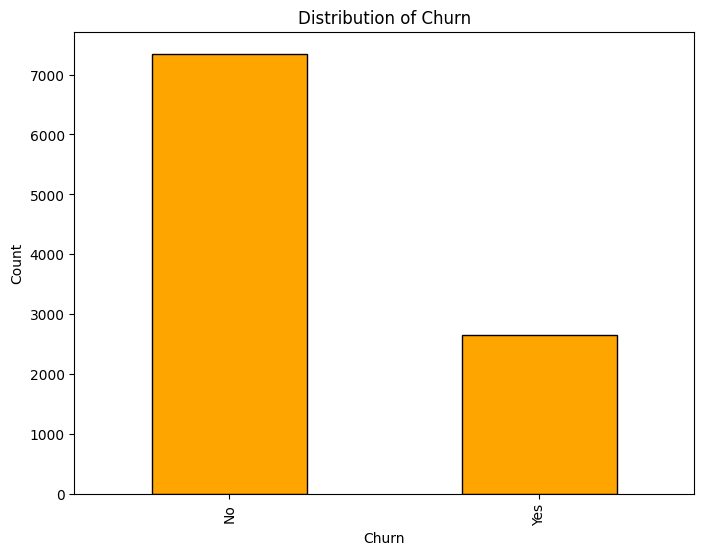

In [ ]:
plt.figure(figsize=(8, 6))
df['churn'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

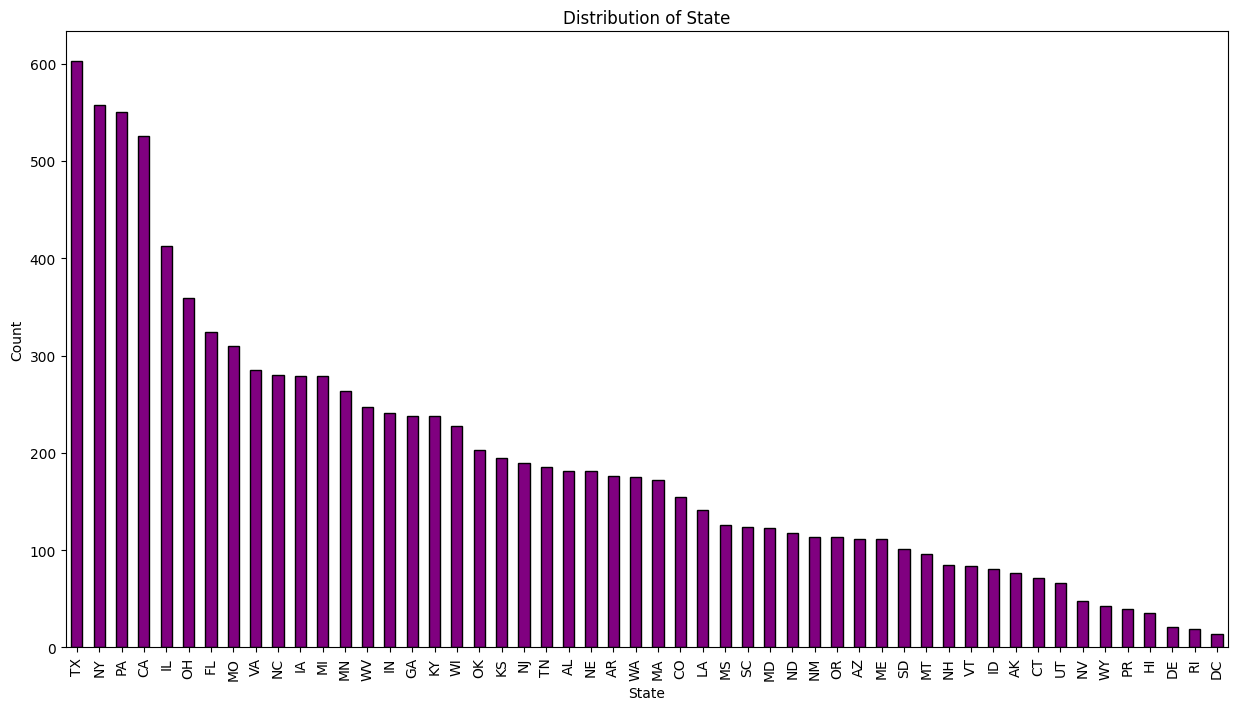

In [ ]:
# Plot the distribution of State
plt.figure(figsize=(15, 8))
df['state'].value_counts().plot(kind='bar', color='purple', edgecolor='black')
plt.title('Distribution of State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


#D:Bivariate Statistics

For the bivariate analysis:

Continuous Variables:

- I'll plot a scatter plot to observe the relationship between `MonthlyCharge` and `Bandwidth_GB_Year` .

Categorical Variables:

- I'll plot a stacked bar chart to observe the relationship between `State` and `Churn`.



#D1:Visual of Findings


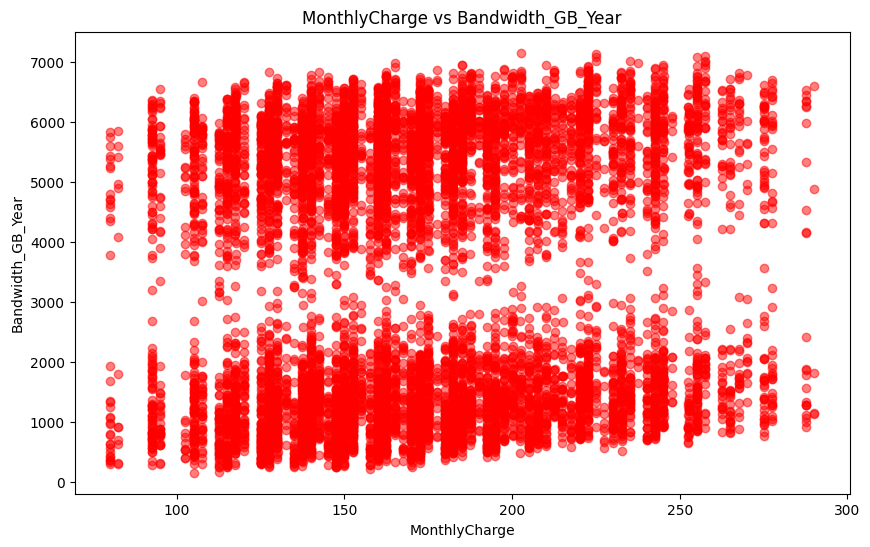

In [ ]:
# Plot the relationship between MonthlyCharge and Bandwidth_GB_Year
plt.figure(figsize=(10, 6))
plt.scatter(df['monthly_charge'], df['bandwidth_gb_year'], alpha=0.5, color='red')
plt.title('MonthlyCharge vs Bandwidth_GB_Year')
plt.xlabel('MonthlyCharge')
plt.ylabel('Bandwidth_GB_Year')
plt.show()

<Figure size 1500x800 with 0 Axes>

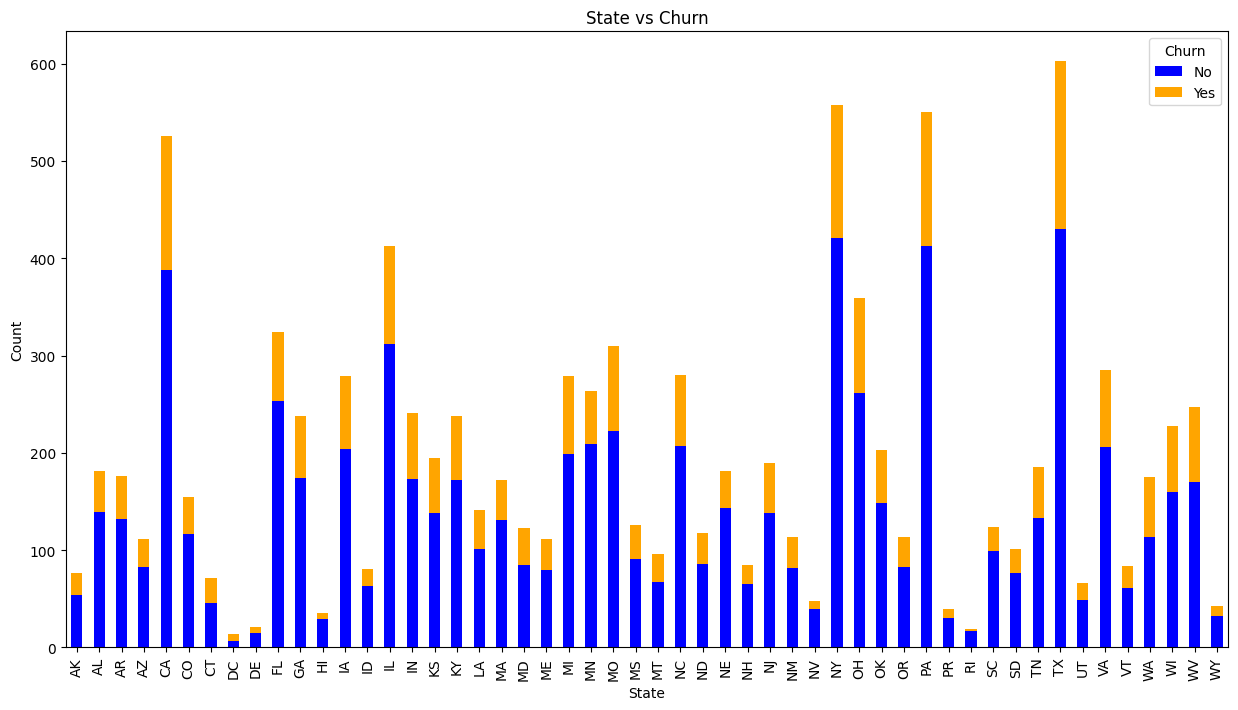

In [ ]:
# Create a crosstab to show the relationship between State and Churn
state_churn = pd.crosstab(df['state'], df['churn'])

# Plot the stacked bar chart
plt.figure(figsize=(15, 8))
state_churn.plot(kind='bar', stacked=True, figsize=(15, 8), color=['blue', 'orange'])
plt.title('State vs Churn')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


#E1:Results of Analysis

The results of the Chi-Square test, which produced a p-value of 0.9999969755238908, strongly suggest that there is no statistically significant difference in churn rates across different states. In the context of hypothesis testing, the p-value is a critical measure that helps determine whether the observed data significantly deviates from the null hypothesis. In this scenario, the null hypothesis posits that there is no association between the state in which a customer resides and their likelihood of churning. If the p-value were less than the commonly accepted significance threshold of 0.05, we would reject the null hypothesis, indicating that state could indeed influence churn rates. However, the exceptionally high p-value in this analysis, much greater than 0.05, leads us to fail to reject the null hypothesis. This result implies that any differences in churn rates between states are most likely due to random variation rather than any real geographic effect on customer behavior. This finding is important because it suggests that the state a customer lives in does not have a significant impact on whether they will churn or not. In other words, geographic location does not appear to be a key factor driving customer decisions to stay with or leave the service. Therefore, efforts to reduce churn should not be geographically targeted but should instead focus on other potential factors, such as customer satisfaction, service quality, or pricing, that might be more relevant across the entire customer base. This analysis helps clarify that location-based strategies may not be effective in addressing churn, and it encourages a broader approach to understanding and mitigating the reasons behind customer attrition.



#E2:Limitations of Analysis

The data analysis has several limitations that need to be considered when interpreting the results. First, the dataset may include other confounding variables that could influence customer churn, such as customer service interactions, pricing plans, or customer satisfaction levels, which were not accounted for in this analysis. These factors could potentially have a significant impact on churn rates, but their effects remain unexamined. Furthermore, while the Chi-Square test is useful for determining whether there is a significant association between two categorical variables, it does not provide information about the strength or direction of that relationship. In other words, the test can tell us whether churn rates differ across states, but it cannot explain how much or in what way they differ. This limitation means that even if a significant relationship were found, further analysis would be needed to understand the nature of that relationship. Additionally, the Chi-Square test assumes that the data meets certain conditions, such as expected frequencies being sufficiently large, and any violations of these assumptions could affect the validity of the results. Overall, while the Chi-Square test is a valuable tool, it should be complemented with other methods and analyses to provide a more comprehensive understanding of the factors influencing customer churn.



#E3:Recommended Course of Action

Despite the analysis showing no significant difference in churn rates across states, stakeholders should not overlook the possibility that other factors may be driving customer churn. Geographic location alone may not explain why customers are leaving, but variables such as customer satisfaction, service quality, pricing structures, or competition could be key contributors. Therefore, it is crucial for stakeholders to conduct more targeted analyses that consider these potential influences. For example, gathering and analyzing customer feedback or service interaction data could uncover underlying issues that lead to dissatisfaction and churn. Additionally, examining how different pricing plans or service offerings correlate with churn could help identify areas for improvement. By focusing on these factors, stakeholders can develop more informed strategies to reduce churn, such as enhancing customer support, optimizing pricing, or improving service reliability. Ultimately, a more comprehensive and nuanced approach to analyzing churn will provide actionable insights that can drive more effective customer retention efforts.
